In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import pandas as pd

In [3]:

img_path = 'C:/Users/Rishabh/Desktop/3rd sem fodenge/DS3 project/dataset/'
# Load color image 
files = []
ext = ['png', 'jpg', 'gif']    # Add image formats here
#hail
[files.extend(glob.glob(img_path +'hail/'+ '*.' + e)) for e in ext]
hail = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY) for file in files]
#dew
[files.extend(glob.glob(img_path +'dew/'+ '*.' + e)) for e in ext]
dew = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY) for file in files]
#glaze
[files.extend(glob.glob(img_path +'glaze/'+ '*.' + e)) for e in ext]
glaze = [cv2.imread(file) for file in files]

df=pd.DataFrame(columns=("image","lable"))

# class_names = sorted(os.listdir(img_path))
class_names=["hail","dew"]
for j in class_names:
    for i in range(len(eval(j))):
        df.loc[len(df.index)] = [eval(j)[i],j] 

df.to_csv("csv_file.csv")
# bgr_img = cv2.imread(img_path)
# # Convert to grayscale
# gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# # Normalize, rescale entries to lie in [0,1]
# gray_img = gray_img.astype("float32")/255
# # Plot image
# plt.imshow(gray_img, cmap='gray')
# plt.show()

In [15]:
import numpy as np
filter_vals = np.array([[-1,1],[-1,1]])
# r=6
# jj=[]
# jj.append([1]*r)

# val=[1]
# for k in range(r-2):
#     val.append(-1)
# val.append(1)
# for i in range(r-2):
#     jj.append(val)
# jj.append([1]*r)
# filter_vals=np.array(jj)
    

print('Filter shape: ', filter_vals.shape)

Filter shape:  (2, 2)


In [ ]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
# Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1  1]
 [-1  1]]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

    
# Neural network with one convolutional layer with four filters
class Net(nn.Module):
        def __init__(self, weight):
                super(Net, self).__init__()
                # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
                k_height, k_width = weight.shape[2:]
                # Assumes there are 4 grayscale filters
                self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
                self.conv.weight = torch.nn.Parameter(weight)
        def forward(self, x):
                # Calculates the output of a convolutional layer pre- and post-activation
                conv_x = self.conv(x)
                activated_x = F.relu(conv_x)
        
                # Returns both layers
                return conv_x, activated_x
    
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1), bias=False)
)


In [ ]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

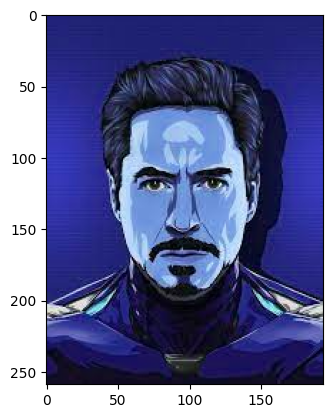

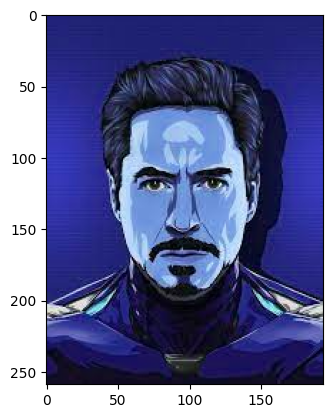

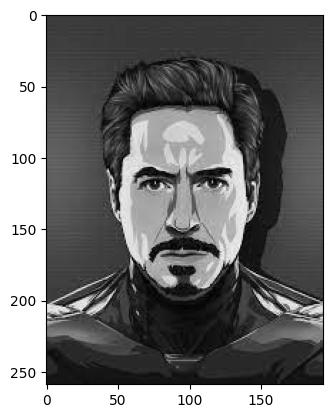

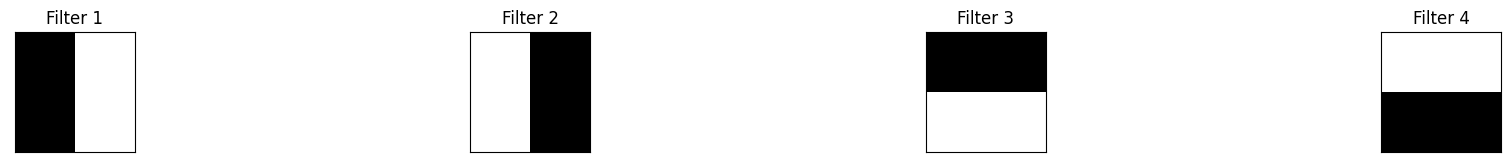

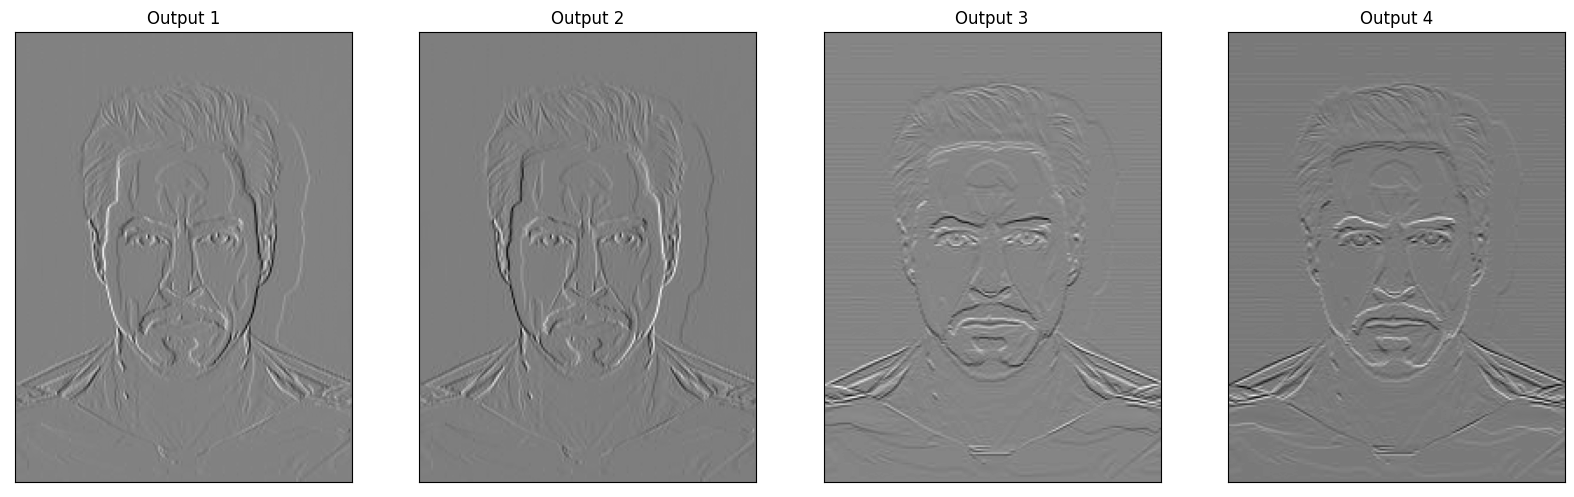

In [ ]:
# Plot original image
plt.imshow(bgr_img)
plt.show()
plt.imshow(bgr_img, cmap='Greens')
plt.show()
plt.imshow(gray_img, cmap='gray')
# Visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)
# Visualize the output of a convolutional layer
viz_layer(conv_layer)

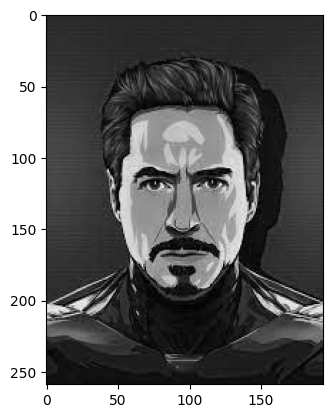

In [ ]:
gray = cv2.cvtColor(bgr_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

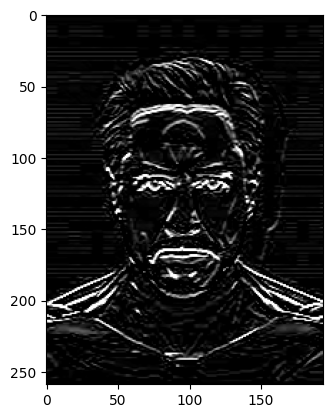

In [ ]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
sobel_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filtered_image, cmap='gray')